In [21]:
import pandas as pd


In [23]:
file_path_kammi = r'C:\Users\radus\OneDrive\2 Epicode\Epicode - Lezioni\M3 - Phyton\BW3\Finale\Supergacsv.csv'
file_path_superga = r'C:\Users\radus\OneDrive\2 Epicode\Epicode - Lezioni\M3 - Phyton\BW3\Finale\Kammicsv.csv'


db_superga = pd.read_csv(file_path_superga, delimiter=',')
db_kammi = pd.read_csv(file_path_kammi,delimiter=',')

In [25]:
db_superga = pd.DataFrame(db_superga)
db_kammi = pd.DataFrame(db_kammi)

print(db_kammi)


      4121-FANRBRW  PALMS-BLACK  35    14  35.1  infradito
0     4121-FANRBRW  PALMS-BLACK  36  14.0    35  infradito
1     4121-FANRBRW  PALMS-BLACK  37  14.0    35  infradito
2     4121-FANRBRW  PALMS-BLACK  38  14.0    35  infradito
3     4121-FANRBRW  PALMS-BLACK  39  14.0    35  infradito
4     4121-FANRBRW  PALMS-BLACK  40  14.0    35  infradito
...            ...          ...  ..   ...   ...        ...
4048    2790 NAPPA        WHITE  38   NaN   105      zeppe
4049    2790 NAPPA        WHITE  39   NaN   105      zeppe
4050    2790 NAPPA        WHITE  40   NaN   105      zeppe
4051    2790 NAPPA        WHITE  41   NaN   105      zeppe
4052    2790 NAPPA        WHITE  42   NaN   105      zeppe

[4053 rows x 6 columns]


In [27]:
db_superga.columns = ['NOME', 'COLORE', 'TAGLIA', 'PREZZO_SCONTATO', 'PREZZO', 'CATEGORIA']
db_kammi.columns = ['NOME', 'COLORE', 'TAGLIA', 'PREZZO_SCONTATO', 'PREZZO', 'CATEGORIA']

In [29]:
print(db_superga.head())

           NOME  COLORE  TAGLIA  PREZZO_SCONTATO  PREZZO CATEGORIA
0  Ciabatta 800  d6d0da      38              NaN    44.0  ciabatta
1  Ciabatta 800  d6d0da      39              NaN    44.0  ciabatta
2  Ciabatta 800  eec4ab      36              NaN    44.0  ciabatta
3  Ciabatta 800  eec4ab      38              NaN    44.0  ciabatta
4  Ciabatta 800  eec4ab      39              NaN    44.0  ciabatta


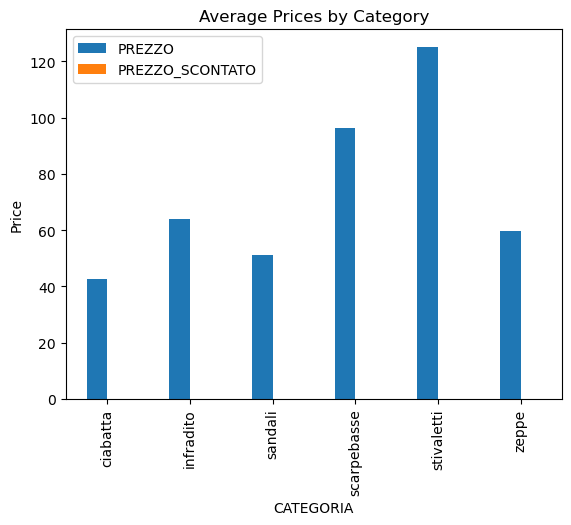

In [31]:
import matplotlib.pyplot as plt

# Example: Bar Chart for Price Comparison by Category
db_superga.groupby('CATEGORIA')[['PREZZO', 'PREZZO_SCONTATO']].mean().plot(kind='bar')
plt.title('Average Prices by Category')
plt.ylabel('Price')
plt.show()

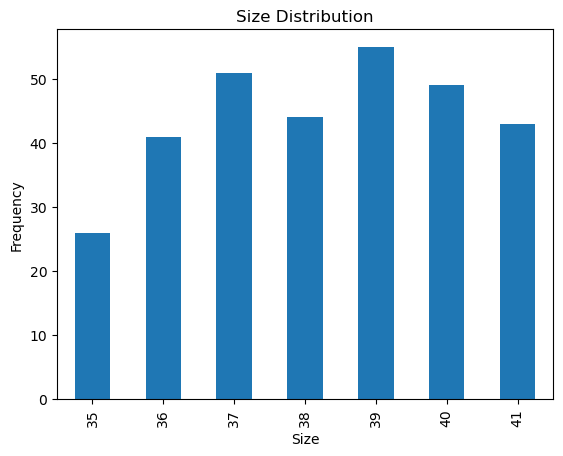

In [33]:
# Example: Histogram of Sizes
db_superga['TAGLIA'].value_counts().sort_index().plot(kind='bar')
plt.title('Size Distribution')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.show()

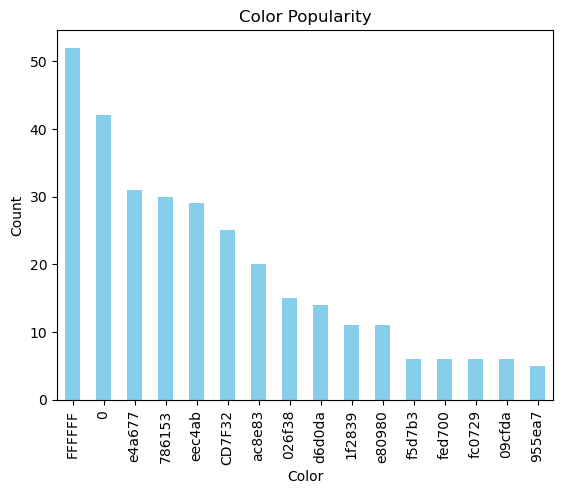

In [35]:
# Example: Bar Chart for Colors
db_superga['COLORE'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Color Popularity')
plt.xlabel('Color')
plt.ylabel('Count')
plt.show()

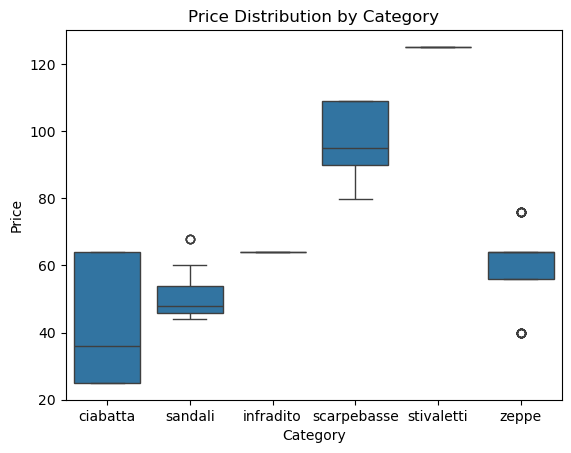

In [37]:
import seaborn as sns

# Example: Box Plot for Price by Category
sns.boxplot(data=db_superga, x='CATEGORIA', y='PREZZO')
plt.title('Price Distribution by Category')
plt.ylabel('Price')
plt.xlabel('Category')
plt.show()

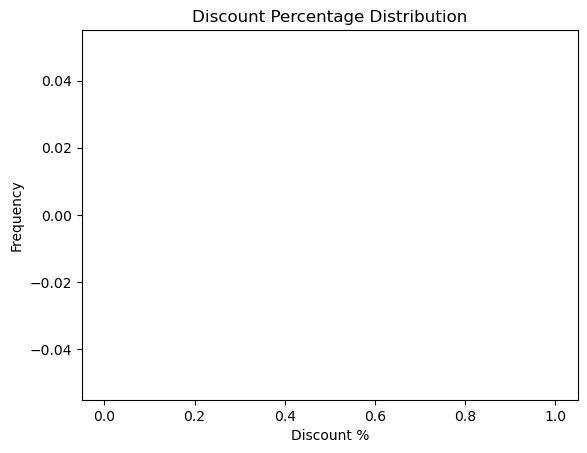

In [46]:
# Calculate Discount Percentage
db_superga['DISCOUNT_PERCENT'] = ((db_superga['PREZZO'] - db_superga['PREZZO_SCONTATO']) / db_superga['PREZZO']) * 100

# Example: Histogram for Discounts
db_superga['DISCOUNT_PERCENT'].plot(kind='hist', bins=10, color='green', alpha=0.7)
plt.title('Discount Percentage Distribution')
plt.xlabel('Discount %')
plt.ylabel('Frequency')
plt.show()

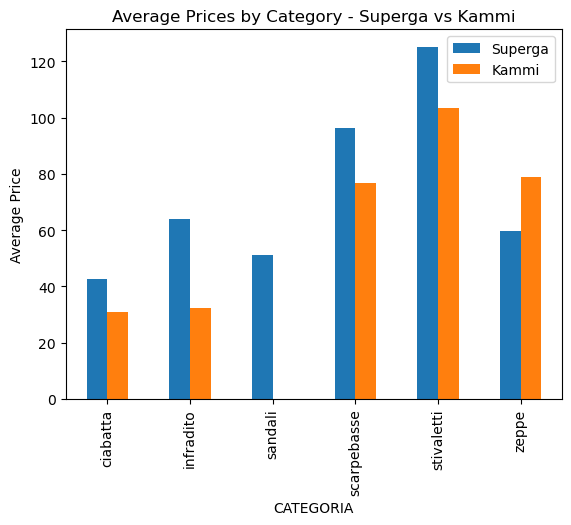

In [41]:
# Example: Side-by-Side Bar Chart for Average Prices by Category
superga_avg = db_superga.groupby('CATEGORIA')['PREZZO'].mean()
kammi_avg = db_kammi.groupby('CATEGORIA')['PREZZO'].mean()

comparison = pd.DataFrame({'Superga': superga_avg, 'Kammi': kammi_avg})
comparison.plot(kind='bar')
plt.title('Average Prices by Category - Superga vs Kammi')
plt.ylabel('Average Price')
plt.show()

In [62]:
# ANALISI SCARPE BASSE 

supergacsv_basse = db_superga[db_superga['CATEGORIA'].str.contains('scarpebasse')].copy()
kammicsv_basse = db_kammi[db_kammi['CATEGORIA'].str.contains('scarpebasse')].copy()

# colonna brand
supergacsv_basse['Brand'] = 'Supergacsv'
kammicsv_basse['Brand'] = 'Kammicsv'


scarpe_basse = pd.concat([supergacsv_basse, kammicsv_basse])
# Raggruppare per brand e calcolare metriche di interesse
aggregati = scarpe_basse.groupby('Brand').agg({'NOME': 'nunique','COLORE': 'nunique',
                                               'TAGLIA': 'count',
                                                'PREZZO': ['mean', 'min', 'max']}).reset_index()
aggregati.columns = ['Brand', 'Modelli Unici', 'Colori Unici', 'Numero di Taglie', 'Prezzo Medio', 'Prezzo Min', 'Prezzo Max']

aggregati

,Brand,Modelli Unici,Colori Unici,Numero di Taglie,Prezzo Medio,Prezzo Min,Prezzo Max
0,Kammicsv,30,150,2858,76.623513,49.0,160.0
1,Supergacsv,7,12,112,96.330357,79.9,109.0


C:\Users\radus\AppData\Local\Temp\ipykernel_28656\2348179939.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=aggregati, x='Brand', y='Modelli Unici', palette=custom_palette )


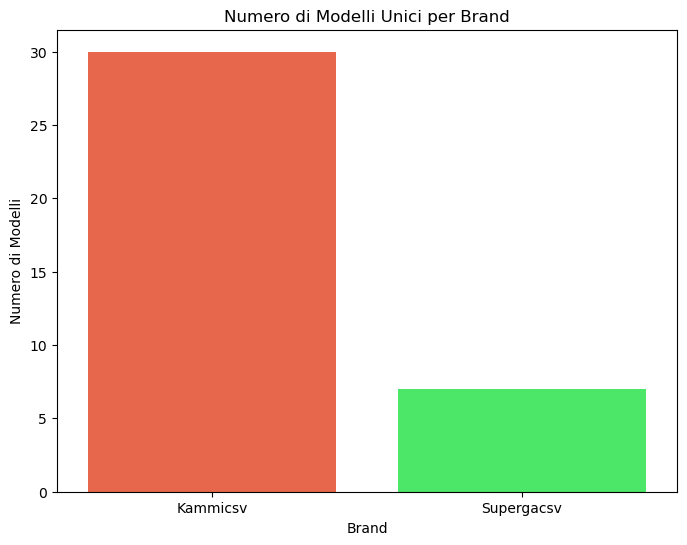

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
custom_palette = ['#FF5733', '#33FF57']
# Numero di modelli unici
plt.figure(figsize=(8, 6))
sns.barplot(data=aggregati, x='Brand', y='Modelli Unici', palette=custom_palette )
plt.title('Numero di Modelli Unici per Brand')
plt.ylabel('Numero di Modelli')
plt.show()

C:\Users\radus\AppData\Local\Temp\ipykernel_28656\592721832.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=aggregati, x='Brand', y='Colori Unici', palette=custom_palette )


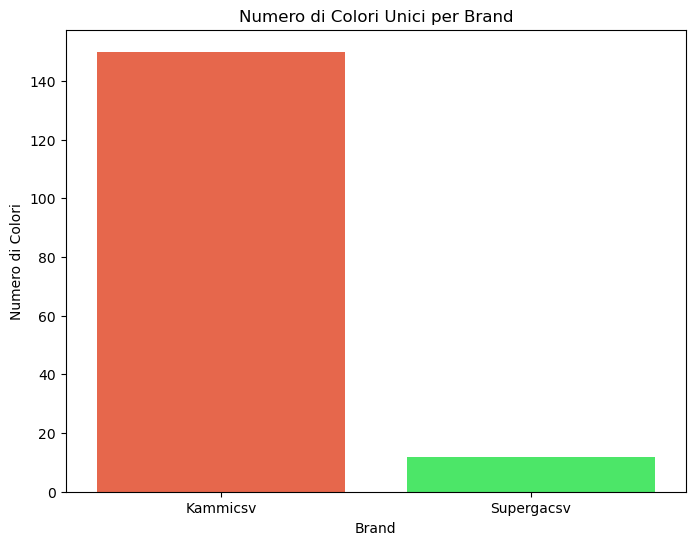

In [88]:
# Numero di colori unici
plt.figure(figsize=(8, 6))
sns.barplot(data=aggregati, x='Brand', y='Colori Unici', palette=custom_palette )
plt.title('Numero di Colori Unici per Brand')
plt.ylabel('Numero di Colori')
plt.show()



C:\Users\radus\AppData\Local\Temp\ipykernel_28656\2234238434.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=aggregati, x='Brand', y='Prezzo Medio', palette=custom_palette)


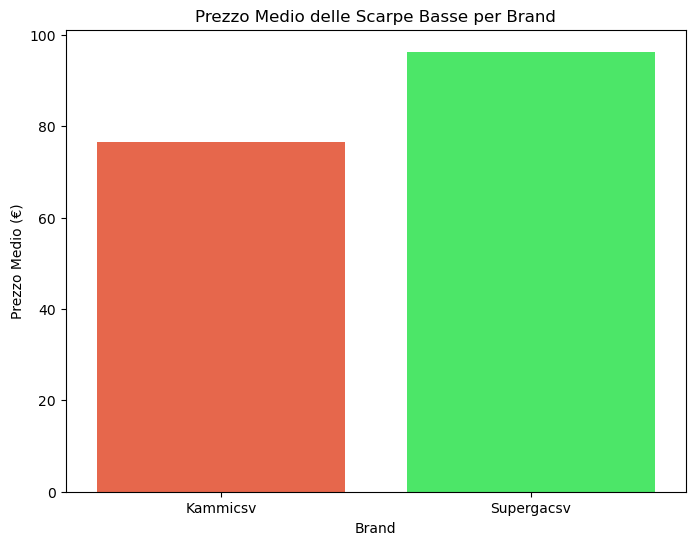

In [92]:
# Prezzo medio per brand
plt.figure(figsize=(8, 6))
sns.barplot(data=aggregati, x='Brand', y='Prezzo Medio', palette=custom_palette)
plt.title('Prezzo Medio delle Scarpe Basse per Brand')
plt.ylabel('Prezzo Medio (€)')
plt.show()

C:\Users\radus\AppData\Local\Temp\ipykernel_28656\484431601.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=aggregati, x='Brand', y='Numero di Taglie', palette=custom_palette)


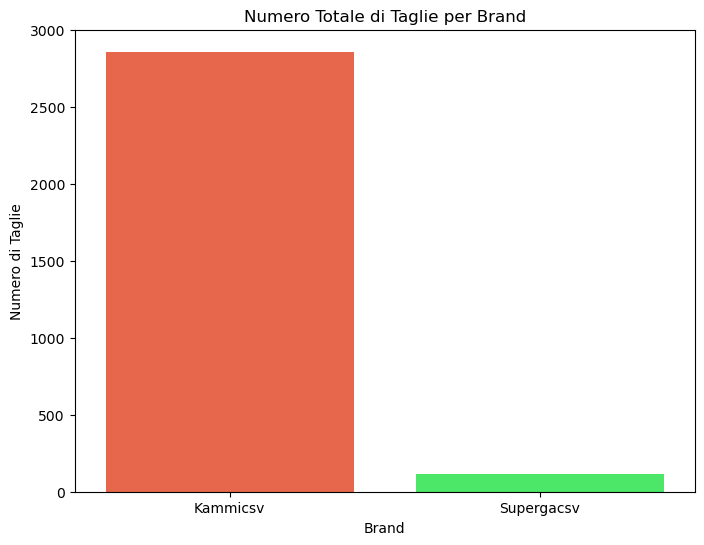

In [102]:
# Numero totale di taglie
plt.figure(figsize=(8, 6))
sns.barplot(data=aggregati, x='Brand', y='Numero di Taglie', palette=custom_palette)
plt.title('Numero Totale di Taglie per Brand')
plt.ylabel('Numero di Taglie')
plt.show()

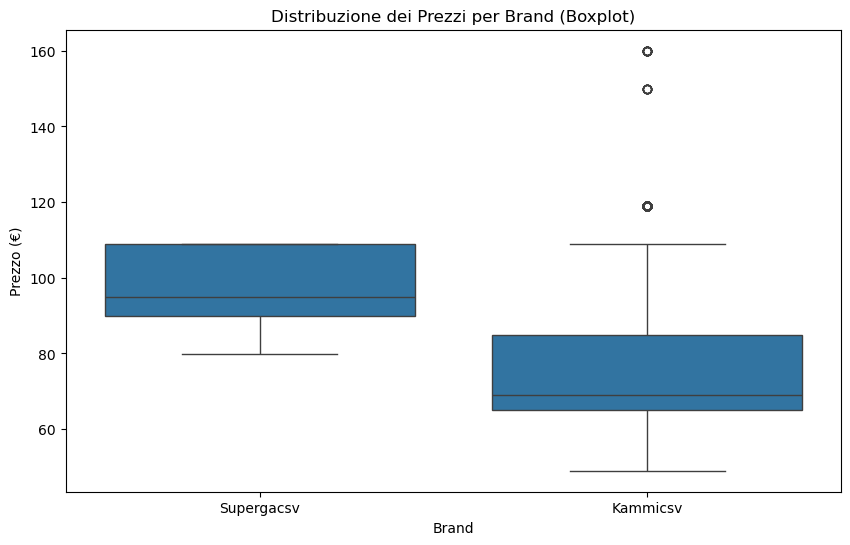

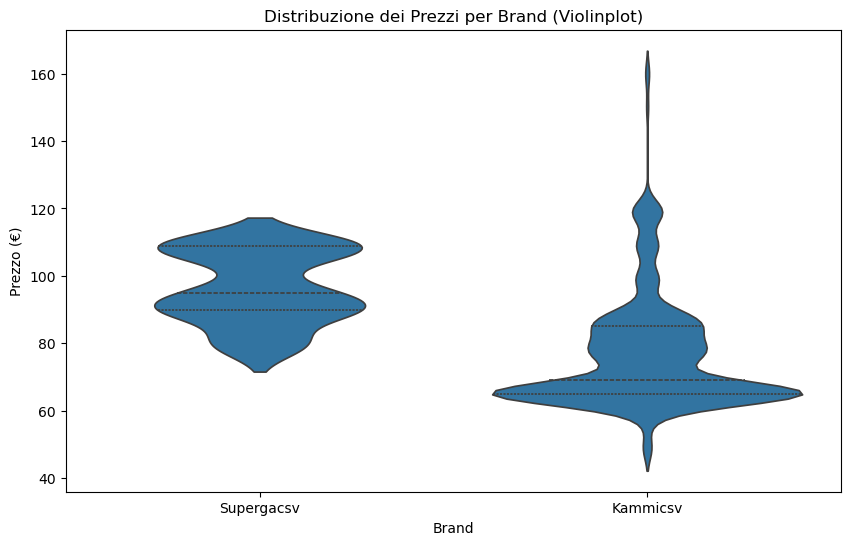

In [104]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=scarpe_basse, x='Brand', y='PREZZO')
plt.title('Distribuzione dei Prezzi per Brand (Boxplot)')
plt.ylabel('Prezzo (€)')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(data=scarpe_basse, x='Brand', y='PREZZO', inner='quartile')
plt.title('Distribuzione dei Prezzi per Brand (Violinplot)')
plt.ylabel('Prezzo (€)')
plt.show()

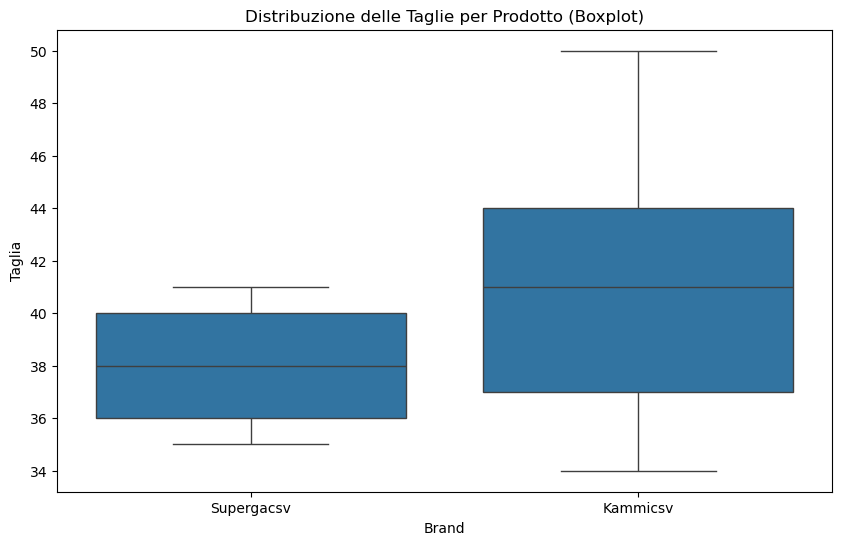

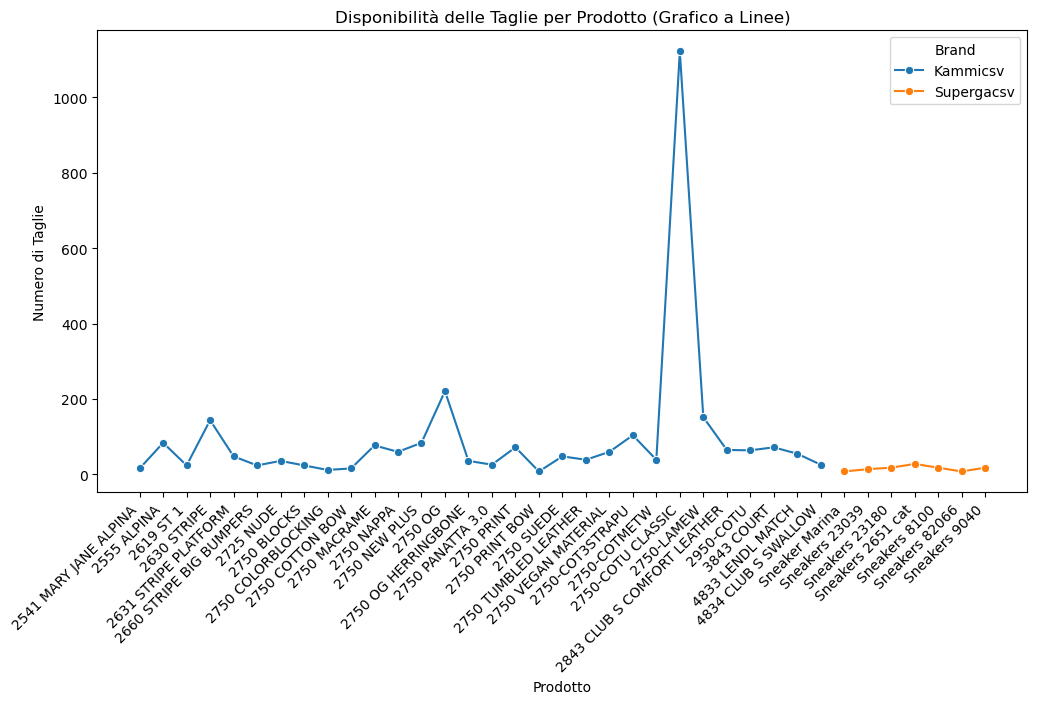

In [106]:

# Creare un boxplot per confrontare la disponibilità delle taglie per prodotto tra i due brand
plt.figure(figsize=(10, 6))
sns.boxplot(data=scarpe_basse, x='Brand', y='TAGLIA')
plt.title('Distribuzione delle Taglie per Prodotto (Boxplot)')
plt.ylabel('Taglia')
plt.show()


Taglie per prodotto
taglie_per_prodotto = scarpe_basse.groupby(['Brand', 'NOME'])['TAGLIA'].count().reset_index(name='Numero di Taglie')
plt.figure(figsize=(12, 6))
sns.lineplot(data=taglie_per_prodotto, x='NOME', y='Numero di Taglie', hue='Brand', marker='o')
plt.title('Disponibilità delle Taglie per Prodotto (Grafico a Linee)')
plt.ylabel('Numero di Taglie')
plt.xlabel('Prodotto')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Brand')
plt.show()

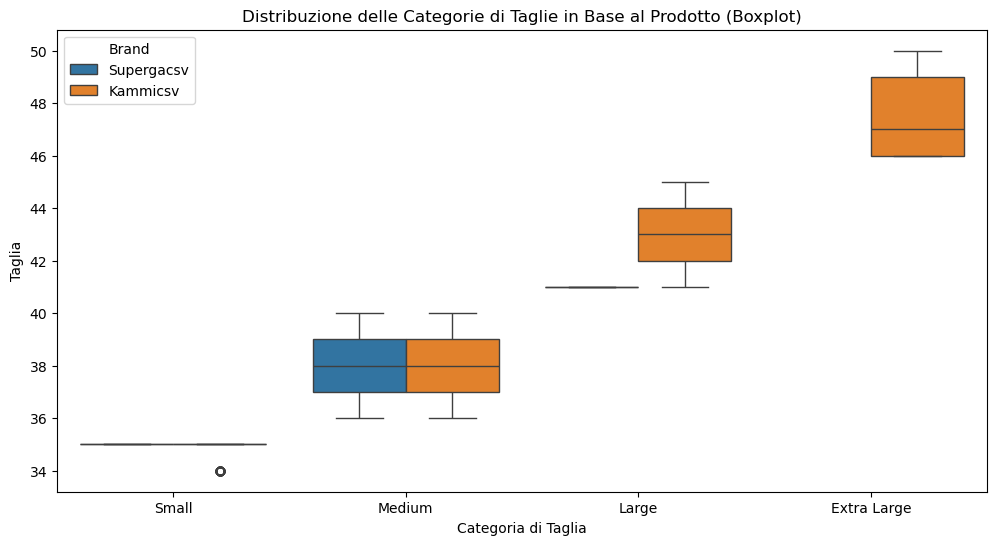

C:\Users\radus\AppData\Local\Temp\ipykernel_28656\2625019592.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  scarpe_basse.groupby(['Brand', 'NOME', 'Categoria Taglia'])['TAGLIA']


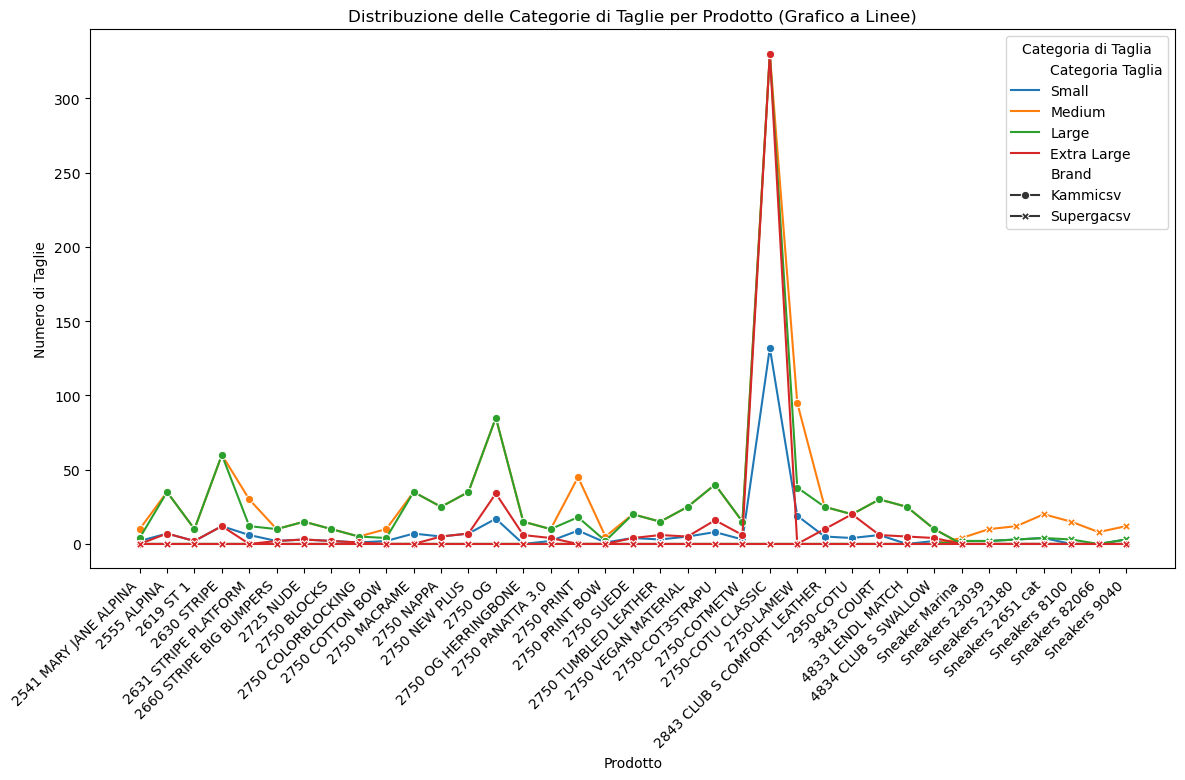

In [108]:
# Creare una colonna per categorizzare le taglie (es. Small, Medium, Large, ecc.)
scarpe_basse['Categoria Taglia'] = pd.cut(
    scarpe_basse['TAGLIA'],
    bins=[0, 35, 40, 45, 50],
    labels=['Small', 'Medium', 'Large', 'Extra Large']
)

# Boxplot per la distribuzione delle categorie di taglie in base al prodotto
plt.figure(figsize=(12, 6))
sns.boxplot(data=scarpe_basse, x='Categoria Taglia', y='TAGLIA', hue='Brand')
plt.title('Distribuzione delle Categorie di Taglie in Base al Prodotto (Boxplot)')
plt.ylabel('Taglia')
plt.xlabel('Categoria di Taglia')
plt.legend(title='Brand')
plt.show()

# Raggruppare i dati per prodotto e categoria di taglia per contare le occorrenze
taglie_categorie = (
    scarpe_basse.groupby(['Brand', 'NOME', 'Categoria Taglia'])['TAGLIA']
    .count()
    .reset_index(name='Numero di Taglie')
)

# Grafico a linee per mostrare la distribuzione delle categorie di taglie per prodotto
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=taglie_categorie,
    x='NOME',
    y='Numero di Taglie',
    hue='Categoria Taglia',
    style='Brand',
    markers=True,
    dashes=False
)
plt.title('Distribuzione delle Categorie di Taglie per Prodotto (Grafico a Linee)')
plt.ylabel('Numero di Taglie')
plt.xlabel('Prodotto')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Categoria di Taglia')
plt.show()

In [121]:
"""
Analisi Economica : 
Fatturato 2023
    Kammi Soc. Coop €13.341.840
        Brand focus con servizio personalizzato incentrato sull'italia
    Superga srkìl €1.085.047
        Fatturato influenzato dalle decisioni del principale brand BasicNet 
"""

"\nAnalisi Economica : \nFatturato 2023\n    Kammi Soc. Coop €13.341.840\n        Brand focus con servizio personalizzato incentrato sull'italia\n    Superga srkìl €1.085.047\n        Fatturato influenzato dalle decisioni del principale brand BasicNet \n"